In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
contfeatureslist=[]
for colname,x in train.iloc[1,:].iteritems():
    if( not str(x).isalpha()):
        contfeatureslist.append(colname)

In [4]:
contfeatureslist

['id',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

In [5]:
contfeatureslist.remove("id")
contfeatureslist.remove("loss")

C:\Users\Architect_shwet\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


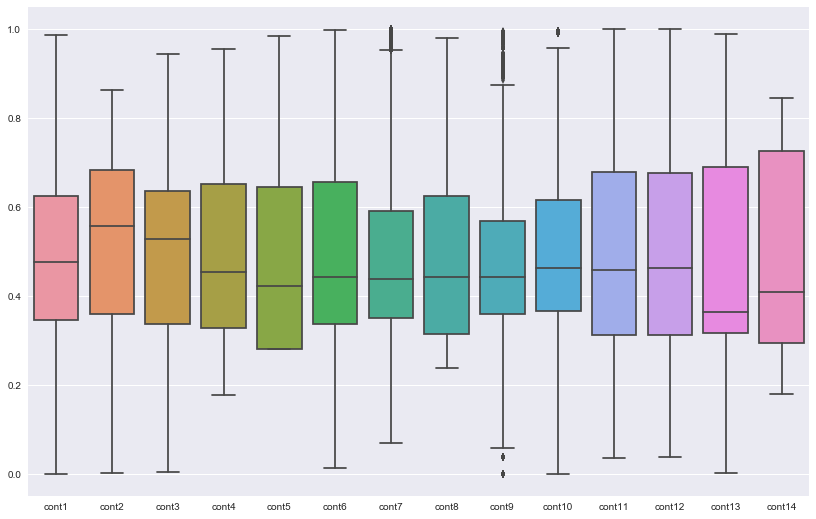

In [6]:
import seaborn as sns
plt.figure(figsize=(14,9))
sns.boxplot(train[contfeatureslist])

As we can see some of the features like cont13, cont14 are highly skewed and we need to normalize them before running any algorithms

In [7]:
#include target variables to find correlation between features and target features as well
contfeatureslist.append("loss")

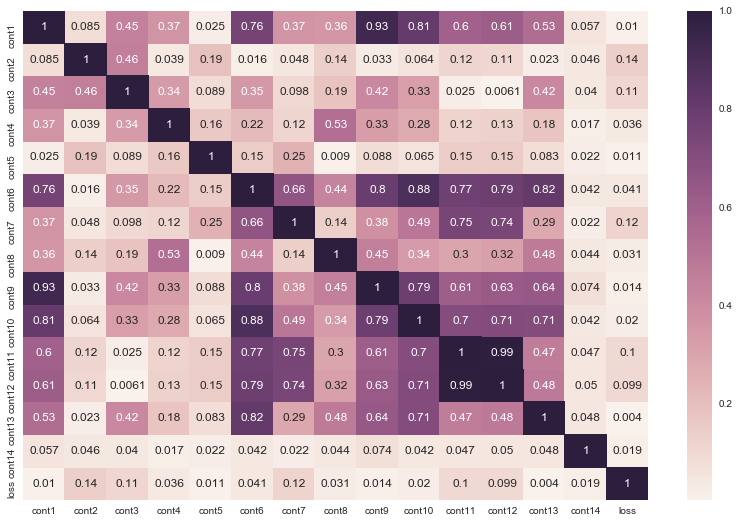

In [8]:
correlationmatrix=train[contfeatureslist].corr().abs()
plt.subplots(figsize=(14,9))
sns.heatmap(correlationmatrix, annot=True)
#
sns.heatmap(correlationmatrix, mask= correlationmatrix<1,cbar=False)
plt.show()

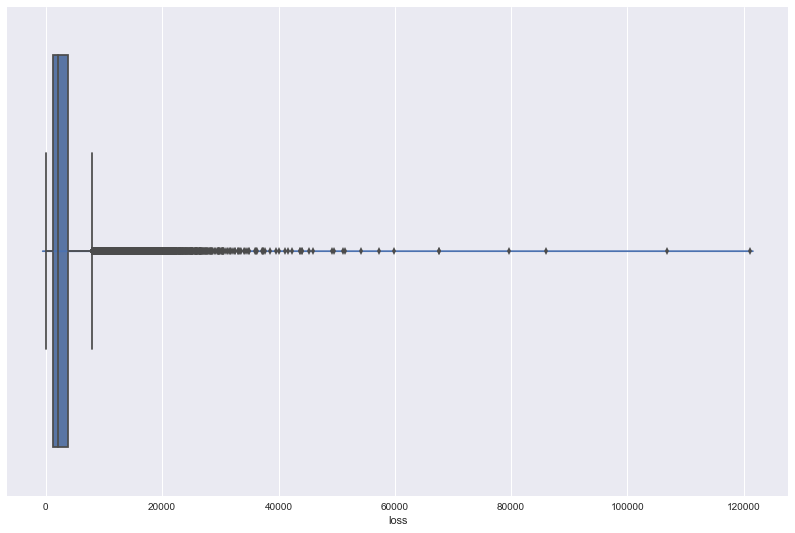

In [9]:
plt.figure(figsize=(14,9))
sns.distplot(train["loss"])
sns.boxplot(train["loss"])

Here we can see loss is highly right skewed data. This happened because there are many outliers in the data as we cans ee from the boxplot. Lets apply log to see if we can see a normal distribution

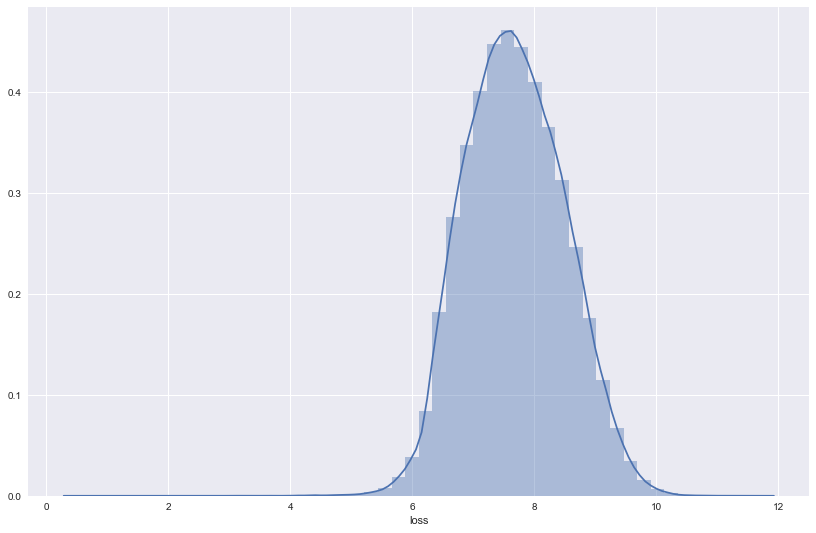

In [10]:
plt.figure(figsize=(14,9))
sns.distplot(np.log1p(train['loss']))

So we got normal distribution by applying logarithm on loss function
 Finally we got normal distribution, so we can train model using target feature as log of loss. This way we don't have to remove outliers.

In [11]:
catcount= sum(str(x).isalpha() for x in train.iloc[1,:])
catcount

116

There are 116 categories with alphanumeric values, most of the machine learning algorithms doesn't work with alpha numeric values.Lets convert them to into numeric values

In [ ]:
Applying labelEncoder over all those categorical columns

In [12]:
catFeatureslist = []
for colName,x in train.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)

In [13]:
from sklearn.preprocessing import LabelEncoder
   

In [14]:
for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(train[cf1].unique())
    train[cf1] = le.transform(train[cf1])

In [15]:
train.head(5)

id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9   ...     \
0   1     0     1     0     1     0     0     0     0     1   ...      
1   2     0     1     0     0     0     0     0     0     1   ...      
2   5     0     1     0     0     1     0     0     0     1   ...      
3  10     1     1     0     1     0     0     0     0     1   ...      
4  11     0     1     0     1     0     0     0     0     1   ...      

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14     loss  
0  0.822493  0.714843  2213.18  
1  0.611431  0.304496  1283.60  
2  0.195709  0.774425  3005.09  
3  0.605077  0.602642   939.85  
4  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [16]:
for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(test[cf1].unique())
    test[cf1] = le.transform(test[cf1])

In [17]:
test.head()

id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9    ...     \
0   4     0     1     0     0     0     0     0     0     1    ...      
1   6     0     1     0     1     0     0     0     0     1    ...      
2   9     0     1     0     1     1     0     1     0     1    ...      
3  12     0     0     0     0     1     0     0     0     0    ...      
4  15     1     0     0     0     0     1     0     0     0    ...      

      cont5     cont6     cont7    cont8    cont9   cont10    cont11  \
0  0.281143  0.466591  0.317681  0.61229  0.34365  0.38016  0.377724   
1  0.836443  0.482425  0.443760  0.71330  0.51890  0.60401  0.689039   
2  0.718531  0.212308  0.325779  0.29758  0.34365  0.30529  0.245410   
3  0.397069  0.369930  0.342355  0.40028  0.33237  0.31480  0.348867   
4  0.302678  0.398862  0.391833  0.23688  0.43731  0.50556  0.359572   

     cont12    cont13    cont14  
0  0.369858  0.704052  0.392562  
1  0.675759  0.453468  0.208045  
2  0.241676  0.258586  0.297232  
3  0.341872  0.592264  0.555955  
4  0.352251  0.301535  0.825823  

[5 rows x 131 columns]

In [18]:
sum(train[catFeatureslist].apply(pd.Series.nunique) > 2)

44

In [19]:
filterg5= list( (train[catFeatureslist].apply(pd.Series.nunique)>5) &  (train[catFeatureslist].apply(pd.Series.nunique)<10
                                                                          ))

In [20]:
sum(filterg5)

8

In [21]:
catFeaturesG5_10List = [i for (i, v) in zip(catFeatureslist, filterg5) if v]
catFeaturesG5_10List

['cat89', 'cat90', 'cat91', 'cat92', 'cat94', 'cat96', 'cat97', 'cat102']

Picking those categorical features which has just 2 different types of values and checking correlation between them.

In [22]:
filterG2 = list((train[catFeatureslist].apply(pd.Series.nunique) == 2))
catFeaturesG2List = [i for (i, v) in zip(catFeatureslist, filterG2) if v]
catFeaturesG2List.append("loss")
len(catFeaturesG2List)

73

In [23]:
corrCatMatrix = train[catFeaturesG2List].corr().abs()
s = corrCatMatrix.unstack()
s

cat1  cat1     1.000000
      cat2     0.168170
      cat3     0.097246
      cat4     0.027433
      cat5     0.012443
      cat6     0.079213
      cat7     0.069294
      cat8     0.084256
      cat9     0.159195
      cat10    0.142100
      cat11    0.101497
      cat12    0.144777
      cat13    0.098445
      cat14    0.041663
      cat15    0.000406
      cat16    0.077100
      cat17    0.035072
      cat18    0.029127
      cat19    0.040586
      cat20    0.013324
      cat21    0.016439
      cat22    0.002993
      cat23    0.078751
      cat24    0.054697
      cat25    0.025899
      cat26    0.004665
      cat27    0.039800
      cat28    0.069469
      cat29    0.048907
      cat30    0.025332
                 ...   
loss  cat44    0.047975
      cat45    0.075448
      cat46    0.046329
      cat47    0.035576
      cat48    0.016151
      cat49    0.025783
      cat50    0.110300
      cat51    0.034457
      cat52    0.031904
      cat53    0.048807
      cat54    0

In [ ]:
Applying log over the target data to have normal distribution

In [24]:
train1=train.iloc[0:8000,:]
test1= test.iloc[0:5000,:]
x_train = train1.drop("loss",axis=1).as_matrix()
y = np.log(train1["loss"]).as_matrix()
x_test = test1.as_matrix()
submission=pd.read_csv('submission.csv')


In [25]:
import os
def write_submission_file(predictions,name):
    if not os.path.exists("results"):
        os.makedirs("results")
        submission.iloc[:, 0]= test.iloc[:,0]
    submission.iloc[:,1] = predictions
    submission.to_csv('results/' + name + '.csv', index=None)

#Overview on the Keras model
Sequential model, a stack of layers is applied in the keras model
'Dropout' consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
'he_normal' draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where  fan_in is the number of input units in the weight tensor.

In [ ]:
# from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU

def nn_model(x_train_):
    model = Sequential()
    # as first layer in a sequential model:
    #Initializations define the way to set the initial random weights of Keras layers
    model.add(Dense(400, input_dim = x_train_.shape[1], init = 'he_normal'))
    model.add(PReLU())
    model.add(Dropout(0.4))
    # after the first layer, you don't need to specify the size of the input anymore:
    model.add(Dense(200, init = 'he_normal'))
    model.add(PReLU())
    model.add(Dropout(0.2))
    model.add(Dense(1, init = 'he_normal'))
    model.compile(loss = 'mae', optimizer = 'adadelta')
    return(model)

In [ ]:
model=nn_model(x_train)
n_epochs = 25
fit = model.fit(x_train,y, nb_epoch = n_epochs,batch_size=250,verbose = 1)
pred = model.predict(x_test,verbose=1)

C:\Users\Architect_shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=131, kernel_initializer="he_normal")`
  import sys
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="he_normal")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="he_normal")`
  del sys.path[0]
C:\Users\Architect_shwet\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/25
8000/8000 [==============================] - 1111s - loss: 903.0984   
Epoch 2/25
8000/8000 [==============================] - 1502s - loss: 606.0764   
Epoch 3/25


In [ ]:
write_submission_file(np.exp(pred),"keras_nn")

In [ ]:

from sklearn.cross_validation import KFold
nfolds = 5
folds = KFold(len(y), n_folds = nfolds, shuffle = True, random_state = 20)

In [ ]:
# Bag NN results
for (train_samples,tune_samples) in folds:
    x_train_f = x_train[train_samples]
    y_train_f = y[train_samples]
    x_tune_f = x_train[tune_samples]
    y_tune_f = y[tune_samples]
    pred = np.zeros(x_tune_f.shape[0])
    
    model = nn_model(x_train_f)
    
    fit = model.fit(x_train_f,y_train_f, nb_epoch = n_epochs,batch_size=10,verbose = 1)
    
    pred = model.predict(x_tune_f,verbose=1)
        
    pred_oob[tune_samples] = pred
    score = mean_absolute_error(y_tune_f, pred)
    i += 1
    print('Fold ', i, '- MAE:', score)